In [41]:
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt

#List of constant values.
surface_area = 0.005 
valence = 3
D_La = 4.4e13
D_Nd = 5.2e13
D_Na = 1.9e15
D_H = 1.1e16

K_H_La = 1.49
K_H_Nd = 1.15
K_H_Na = 0.32

#J_Na = D_Na*C_Na_mem0
#J_H = D_H*C_H_mem0
I = 20
F = 96485
V = 0.00125

tspan = np.linspace(0, 60000, 100)

def RKG_Takahashi(z, t):
    '''
        z[0] = C_La
        z[1] = C_Nd
        z[2] = C_Na
        z[3] = C_H
        
        f1 = dC_La/dt
        f2 = dC_Nd/dt
        f3 = dC_Na/dt
        f4 = dC_H/dt
        
        ** Need to convert f5-f8 into an array**
    '''
    ## solve the equations 7-9 simultaneously here prior to the four DEs
    
    C_La_mem, C_Nd_mem, C_Na_mem, C_H_mem = z # initial values
    
    f1 = surface_area * ((valence * D_La * C_La_mem) / \
                         (valence**2 * D_La * C_La_mem + \
                          valence**2 * D_Nd * C_Nd_mem + \
                          D_Na * C_Na_mem + D_H * C_H_mem)) * I/F * 1/-V
    
    f2 = surface_area * ((valence * D_Nd * C_Nd_mem) / \
                         (valence**2 * D_Nd * C_Nd_mem + \
                          valence**2 * D_La * C_La_mem + \
                          D_Na * C_Na_mem + D_H * C_H_mem)) * I/F * 1/-V
    
    f3 = surface_area * ((D_Na * C_Na_mem) / (valence**2 * D_La * C_La_mem + \
                                              valence**2 * D_Nd * C_Nd_mem + \
                                              D_Na * C_Na_mem + D_H * C_H_mem)) * I/F * 1/-V
    
    f4 = surface_area * ((D_H * C_H_mem) / (valence**2 * D_La * C_La_mem + \
                                            valence**2 * D_Nd * C_Nd_mem + \
                                            D_Na * C_Na_mem + D_H * C_H_mem)) * I/F * 1/-V
     
    return [f1, f2, f3, f4]

In [42]:
sol = odeint(RKG_Takahashi, [9.5, 3, 5, 1], tspan)

In [43]:
type(sol)

numpy.ndarray

In [44]:
sol

array([[ 9.50000000e+00,  3.00000000e+00,  5.00000000e+00,
         1.00000000e+00],
       [ 9.47411785e+00,  2.99034303e+00,  4.80746069e+00,
         7.96644884e-01],
       [ 9.44536282e+00,  2.97961977e+00,  4.60165182e+00,
         6.18376875e-01],
       [ 9.41342801e+00,  2.96771767e+00,  4.38270844e+00,
         4.66319219e-01],
       [ 9.37804648e+00,  2.95453955e+00,  4.15147454e+00,
         3.40720270e-01],
       [ 9.33902202e+00,  2.94001507e+00,  3.90962606e+00,
         2.40703780e-01],
       [ 9.29625128e+00,  2.92410894e+00,  3.65965589e+00,
         1.64192798e-01],
       [ 9.24972696e+00,  2.90682199e+00,  3.40468318e+00,
         1.08087551e-01],
       [ 9.19951841e+00,  2.88818382e+00,  3.14812538e+00,
         6.86737301e-02],
       [ 9.14573624e+00,  2.86823958e+00,  2.89333683e+00,
         4.21297497e-02],
       [ 9.08849434e+00,  2.84703578e+00,  2.64332519e+00,
         2.49667115e-02],
       [ 9.02788123e+00,  2.82460965e+00,  2.40060279e+00,
      

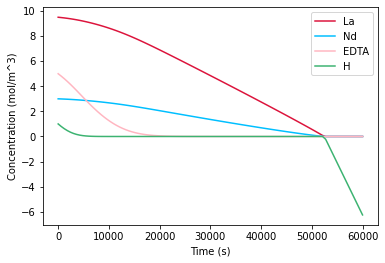

In [45]:
plt.plot(tspan, sol[:,0], 'crimson')
plt.plot(tspan, sol[:,1], 'deepskyblue')
plt.plot(tspan, sol[:,2], 'lightpink')
plt.plot(tspan, sol[:,3], 'mediumseagreen')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol/m^3)')
plt.legend(['La', 'Nd', 'EDTA', 'H'])

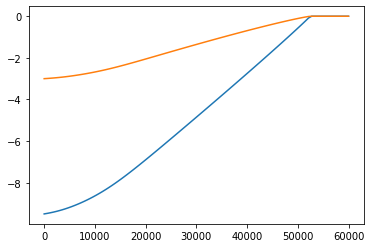

In [46]:
CLa = sol[:,0]
CNd = sol[:,1]

conc = [np.empty(len(CLa)), np.empty(len(CLa))]

for i in range(len(CLa)):
    conc[0][i] = CLa[i]*-1
    conc[1][i] = CNd[i]*-1
    
plt.plot(tspan, conc[0])
plt.plot(tspan, conc[1])

In [47]:
def RKG_Takahashi_strip(z, t):
    '''
        z[0] = C_La
        z[1] = C_Nd
        z[2] = C_Na
        z[3] = C_H
        
        f1 = dC_La/dt
        f2 = dC_Nd/dt
        f3 = dC_Na/dt
        f4 = dC_H/dt
        
        ** Need to convert f5-f8 into an array**
    '''
    ## solve the equations 7-9 simultaneously here prior to the four DEs
    
    C_La_mem, C_Nd_mem, C_Na_mem, C_H_mem = z # initial values
    
    f1 = surface_area * ((valence * D_La * C_La_mem) / \
                         (valence**2 * D_La * C_La_mem + \
                          valence**2 * D_Nd * C_Nd_mem + \
                          D_Na * C_Na_mem + D_H * C_H_mem)) * I/F * 1/V
    
    f2 = surface_area * ((valence * D_Nd * C_Nd_mem) / \
                         (valence**2 * D_Nd * C_Nd_mem + \
                          valence**2 * D_La * C_La_mem + \
                          D_Na * C_Na_mem + D_H * C_H_mem)) * I/F * 1/V
    
    f3 = surface_area * ((D_Na * C_Na_mem) / (valence**2 * D_La * C_La_mem + \
                                              valence**2 * D_Nd * C_Nd_mem + \
                                              D_Na * C_Na_mem + D_H * C_H_mem)) * I/F * 1/V
    
    f4 = surface_area * ((D_H * C_H_mem) / (valence**2 * D_La * C_La_mem + \
                                            valence**2 * D_Nd * C_Nd_mem + \
                                            D_Na * C_Na_mem + D_H * C_H_mem)) * I/F * 1/V
     
    return [f1, f2, f3, f4]

In [48]:
sol_strip = odeint(RKG_Takahashi_strip, [1, 1, 1, 1], tspan)

In [49]:
sol_strip

array([[ 1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.00416268,  1.00492139,  1.06161675,  1.41364282],
       [ 1.00737757,  1.00872478,  1.11160235,  1.84511412],
       [ 1.0099839 ,  1.01180984,  1.15372406,  2.28843006],
       [ 1.01216963,  1.01439815,  1.19018838,  2.74015538],
       [ 1.01404864,  1.01662406,  1.22239006,  3.1981507 ],
       [ 1.01569472,  1.01857466,  1.25126417,  3.66099834],
       [ 1.01715822,  1.02030938,  1.27746735,  4.12771227],
       [ 1.01847495,  1.02187052,  1.30147813,  4.59757965],
       [ 1.01967123,  1.02328917,  1.32365598,  5.07006877],
       [ 1.02076696,  1.02458885,  1.34427776,  5.54477254],
       [ 1.02177753,  1.02578773,  1.36356135,  6.02137239],
       [ 1.02271506,  1.02690017,  1.38168125,  6.49961434],
       [ 1.0235893 ,  1.02793767,  1.39877949,  6.97929266],
       [ 1.02440817,  1.02890961,  1.41497317,  7.46023833],
       [ 1.0251782 ,  1.02982371,  1.43036008,  7.94231079],
       [ 1.02590485,  1.

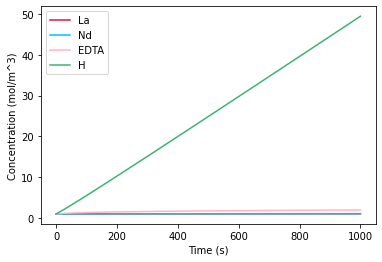

In [50]:
tspan2 = np.linspace(0, 1000, 100)

plt.plot(tspan2, sol_strip[:,0], 'crimson')
plt.plot(tspan2, sol_strip[:,1], 'deepskyblue')
plt.plot(tspan2, sol_strip[:,2], 'lightpink')
plt.plot(tspan2, sol_strip[:,3], 'mediumseagreen')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol/m^3)')
plt.legend(['La', 'Nd', 'EDTA', 'H'])

In [ ]:
def odeint_taka(z, t):
    
    dzdt = surface_area * ((valence * D_La * z) / (valence**2 * D_La * z + valence**2 * D_Nd * 10 + D_Na * 5 + D_H * 0.0488)) * I/F * 1/-V
    
    return dzdt

In [ ]:
sol_odeint = odeint(odeint_taka, [10.0], tspan)

In [ ]:
sol_odeint

In [ ]:
plt.plot(tspan, sol_odeint)